In [ ]:
!unzip "/content/drive/MyDrive/MRarchive.zip"

In [2]:
import matplotlib.pyplot as plt

In [3]:
# store list
images = []
lables = []

## AD Patient Brain Scan with PreProcessing of the Image ##
# Python program to explain cv2.imread() method

# importing cv2 
import cv2
import glob  
 
# Using cv2.imread() method
# Using 0 to read image in grayscale mode

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    n=cv2.resize(n,(200, 200))
    img_list.append(n)
    lables.append(0)  # Mild Demented
    return img_list

path = glob.glob("/content/MRarchive/Dataset/Mild_Demented/*.jpg")
cv_image = [read_img(images, img) for img in path]





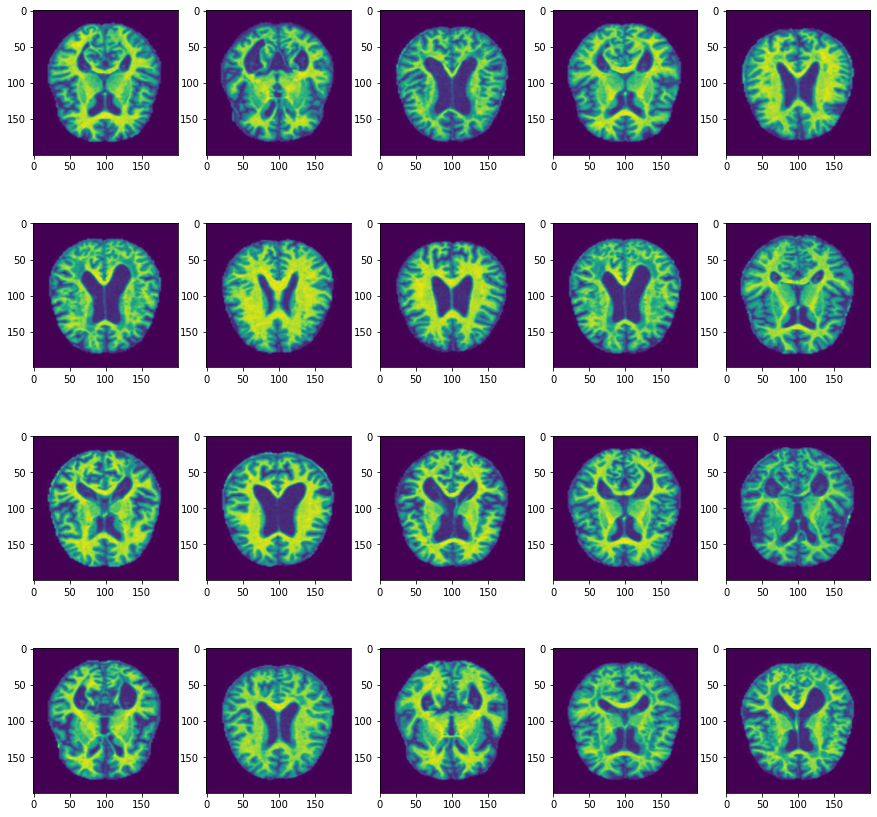

In [4]:
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[10 + i*3])
plt.show()

In [5]:
# Using cv2.imread() method
# Using 0 to read image in grayscale mode

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    n=cv2.resize(n,(200, 200))
    img_list.append(n)
    lables.append(1)  # Moderate Demented
    return img_list

path = glob.glob("/content/MRarchive/Dataset/Moderate_Demented/*.jpg")
cv_image = [read_img(images, img) for img in path]



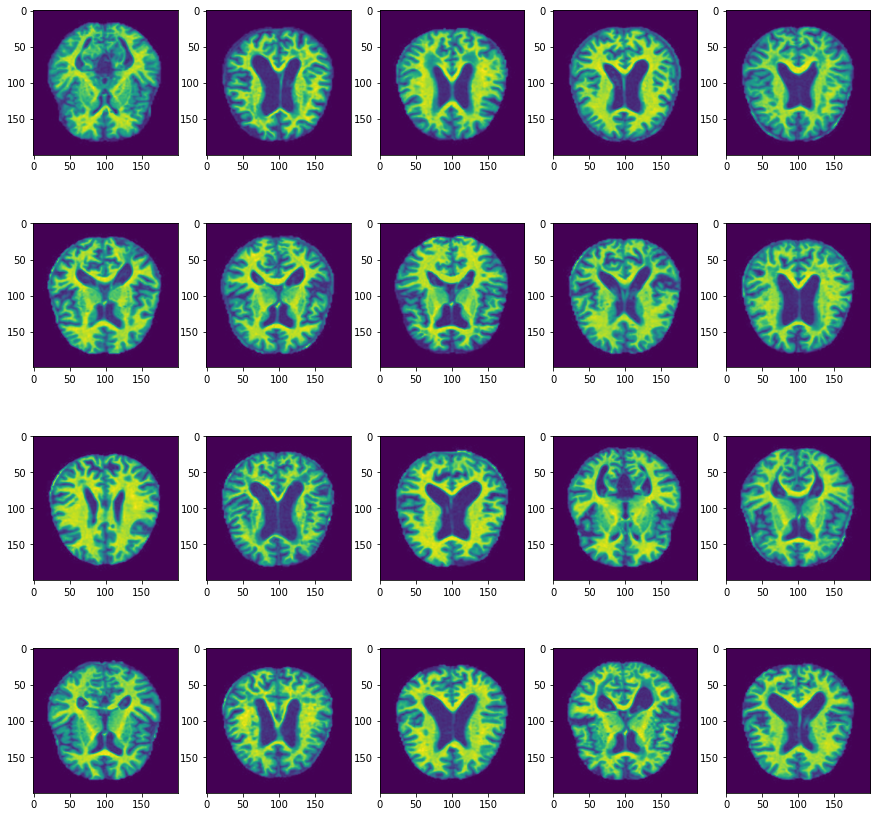

In [6]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[200 + i*3])
plt.show()

In [7]:
# Using cv2.imread() method
# Using 0 to read image in grayscale mode

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    n=cv2.resize(n,(200, 200))
    img_list.append(n)
    lables.append(2)  # Non Demented
    return img_list

path = glob.glob("/content/MRarchive/Dataset/Non_Demented/*.jpg")
cv_image = [read_img(images, img) for img in path]



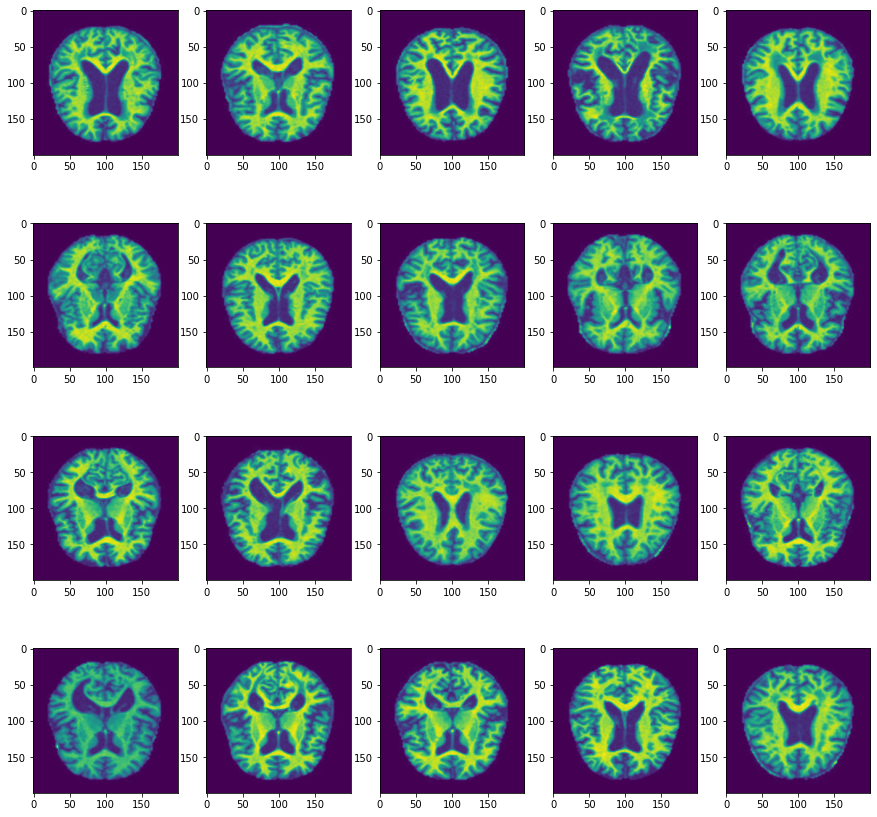

In [8]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[500 + i*3])
plt.show()

In [9]:
# Using cv2.imread() method
# Using 0 to read image in grayscale mode

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    n=cv2.resize(n,(200, 200))
    img_list.append(n)
    lables.append(3)  # Very MildDemented
    return img_list

path = glob.glob("/content/MRarchive/Dataset/Very_Mild_Demented/*.jpg")
cv_image = [read_img(images, img) for img in path]



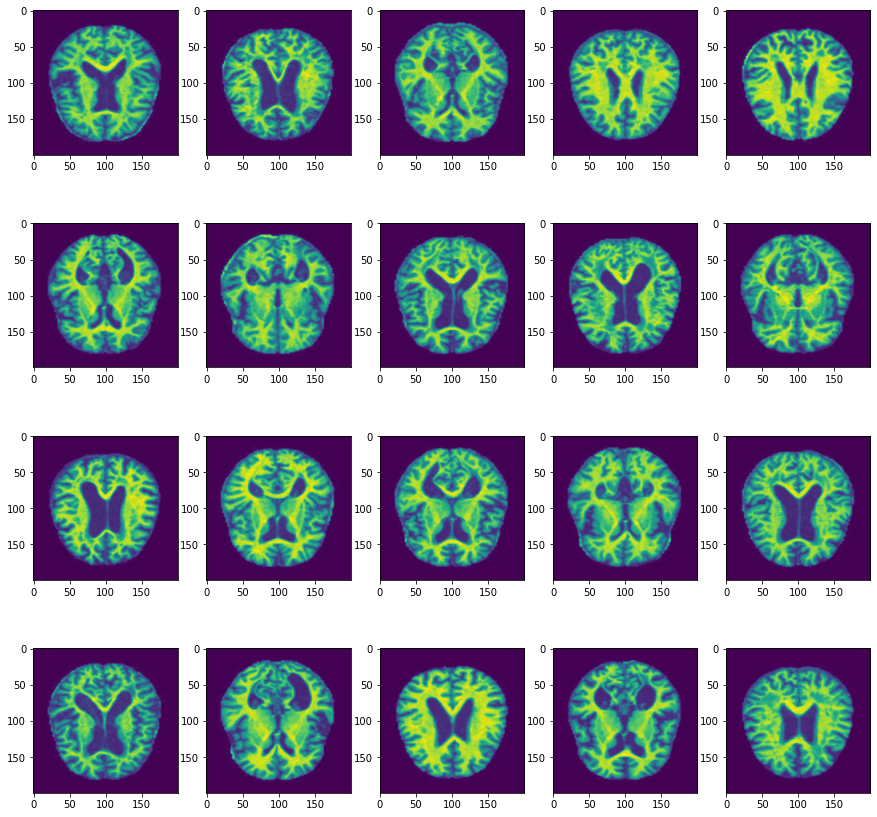

In [10]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[700 + i*3])
plt.show()

In [11]:
# Shape of the Images

print(f"Shape of each image is = {images[1000].shape}")

Shape of each image is = (200, 200)


In [12]:
# Convert The List into Array Format  #

import numpy as np

train_feature = np.array(images)
lables = np.array(lables)

In [13]:
## Display Array Shape ##

print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (4200, 200, 200)
lable dataset shape = (4200,)


In [14]:
#Split The Dataset into Test and Train

In [15]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(train_feature,lables,test_size=0.12)

print(f"train_features shape = {train_features.shape}")

print(f"test_features shape = {test_features.shape}")

print(f"train_target shape = {train_target.shape}")

print(f"test_target shape = {test_target.shape}")

train_features shape = (3696, 200, 200)
test_features shape = (504, 200, 200)
train_target shape = (3696,)
test_target shape = (504,)


In [16]:
#Deep Learning CNN Model Architecture

In [17]:
# MODEL ARCHITECTURE

import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE NOT ENCODING

train_target = to_categorical(lables)

# MODEL LAYERS

model=Sequential()
# Convolutional Layers
model.add(Conv2D(25, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200, 200, 1)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 25)      250       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 75)      16950     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 75)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 750000)            0         
                                                                 
 dense (Dense)               (None, 500)               375000500 
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                        

In [18]:
# MODEL COPILE

from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# MODEL FITTING

model.fit(train_feature, train_target, batch_size = 120, epochs = 20)

Epoch 1/20
35/35 [==============================] - 907s 26s/step - loss: 189.0349 - accuracy: 0.3919
Epoch 2/20
35/35 [==============================] - 919s 26s/step - loss: 1.0636 - accuracy: 0.5202
Epoch 3/20
35/35 [==============================] - 936s 27s/step - loss: 0.9797 - accuracy: 0.5545
Epoch 4/20
35/35 [==============================] - 936s 27s/step - loss: 0.9314 - accuracy: 0.5693
Epoch 5/20
35/35 [==============================] - 919s 26s/step - loss: 0.8626 - accuracy: 0.6038
Epoch 6/20
35/35 [==============================] - 913s 26s/step - loss: 0.7098 - accuracy: 0.6869
Epoch 7/20
35/35 [==============================] - 937s 27s/step - loss: 0.3716 - accuracy: 0.8469
Epoch 8/20
35/35 [==============================] - 923s 26s/step - loss: 0.1632 - accuracy: 0.9452
Epoch 9/20
35/35 [==============================] - 929s 27s/step - loss: 0.0863 - accuracy: 0.9698
Epoch 10/20
35/35 [==============================] - 912s 26s/step - loss: 0.0400 - accuracy: 0.98

In [20]:
# Test our Model

predictions = model.predict(test_features)

16/16 [==============================] - 31s 2s/step


In [22]:
# Accuracy of Our Model #

wrong = 0

for i in range(504) :
    test = np.argmax(predictions[i])
    train = test_target[i]
    if (test != train):
        wrong += 1

print(f"Model Accuracy : {((504 - wrong)/504)*100} %")

Model Accuracy : 100.0 %
